# Suggestion de Tags - Approche non supervisée

#### Divers: Imports, options

In [1]:
%load_ext pycodestyle_magic
%flake8_on --max_line_length 130

In [2]:
# suppression des "FutureWarning"
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
import time as time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk

In [4]:
pd.set_option('display.max_columns', None)

## Chargement Données

In [5]:
df = pd.read_csv("questions_clean.csv", index_col=0)
df

,Title,Body,Tags,Text
0,java record array,give follow code public static void main strin...,<java><arrays><java-14><java-record>,java record array give follow code public stat...
1,blue flicker stripe mbp chrome,new macbook pro late catalina recently find we...,<google-chrome><graphics><macos-catalina>,blue flicker stripe mbp chrome new macbook pro...
2,create dependson relation ec rds use aws cdk,currently use aws cdk typescript create stack ...,<amazon-web-services><amazon-ec2><amazon-rds><...,create dependson relation ec rds use aws cdk c...
3,colab class weight cause valueerror truth valu...,run cnn kera sequential google colab get follo...,<python><tensorflow><keras><google-colaborator...,colab class weight cause valueerror truth valu...
4,pas custom function inside foreach object para...,find way pas function variable idea without pu...,<powershell><powershell-core>,pas custom function inside foreach object para...
...,...,...,...,...
8064,daemon stop immediately jvm garbage collector ...,build multi module java project use gradle add...,<java><gradle>,daemon stop immediately jvm garbage collector ...
8065,difference mono flux fromcallable mono defer,usually requirement generate mono flux whose v...,<spring-webflux><project-reactor>,difference mono flux fromcallable mono defer u...
8066,compare generic structs c,want compare structs generic way do something ...,<c++><templates><struct><padding><memcmp>,compare generic structs c want compare structs...
8067,set custom http error kubernetes,want create custom error page currently alread...,<kubernetes><kubernetes-ingress>,set custom http error kubernetes want create c...


In [6]:
df['Text'][0]

'java record array give follow code public static void main string args record foo int ints var ints new int var foo new foo ints system println foo foo ints system println new foo new int equal new foo new int false system println new foo ints equal new foo ints true system println foo equal foo true seem obviously array tostring equal method use instead static method array equal array deepequals array tostring guess java record jep work well arrays respective method generate ide least intellij default generates useful method e use static method array solution'

## Tokenization

In [7]:
tokenizer = nltk.RegexpTokenizer(r'\w+')
df['Text_tok'] = df['Text'].map(tokenizer.tokenize)

In [8]:
df['FreqDist'] = df['Text_tok'].map(nltk.FreqDist)
df['WordCount'] = df['Text_tok'].map(len)
df['UniqueWordCount'] = df['FreqDist'].map(len)

In [9]:
df

,Title,Body,Tags,Text,Text_tok,FreqDist,WordCount,UniqueWordCount
0,java record array,give follow code public static void main strin...,<java><arrays><java-14><java-record>,java record array give follow code public stat...,"[java, record, array, give, follow, code, publ...","{'java': 2, 'record': 3, 'array': 6, 'give': 1...",97,44
1,blue flicker stripe mbp chrome,new macbook pro late catalina recently find we...,<google-chrome><graphics><macos-catalina>,blue flicker stripe mbp chrome new macbook pro...,"[blue, flicker, stripe, mbp, chrome, new, macb...","{'blue': 2, 'flicker': 2, 'stripe': 2, 'mbp': ...",58,49
2,create dependson relation ec rds use aws cdk,currently use aws cdk typescript create stack ...,<amazon-web-services><amazon-ec2><amazon-rds><...,create dependson relation ec rds use aws cdk c...,"[create, dependson, relation, ec, rds, use, aw...","{'create': 2, 'dependson': 2, 'relation': 1, '...",70,43
3,colab class weight cause valueerror truth valu...,run cnn kera sequential google colab get follo...,<python><tensorflow><keras><google-colaborator...,colab class weight cause valueerror truth valu...,"[colab, class, weight, cause, valueerror, trut...","{'colab': 2, 'class': 11, 'weight': 8, 'cause'...",447,187
4,pas custom function inside foreach object para...,find way pas function variable idea without pu...,<powershell><powershell-core>,pas custom function inside foreach object para...,"[pas, custom, function, inside, foreach, objec...","{'pas': 2, 'custom': 1, 'function': 4, 'inside...",36,23
...,...,...,...,...,...,...,...,...
8064,daemon stop immediately jvm garbage collector ...,build multi module java project use gradle add...,<java><gradle>,daemon stop immediately jvm garbage collector ...,"[daemon, stop, immediately, jvm, garbage, coll...","{'daemon': 16, 'stop': 3, 'immediately': 2, 'j...",144,50
8065,difference mono flux fromcallable mono defer,usually requirement generate mono flux whose v...,<spring-webflux><project-reactor>,difference mono flux fromcallable mono defer u...,"[difference, mono, flux, fromcallable, mono, d...","{'difference': 3, 'mono': 9, 'flux': 2, 'fromc...",69,42
8066,compare generic structs c,want compare structs generic way do something ...,<c++><templates><struct><padding><memcmp>,compare generic structs c want compare structs...,"[compare, generic, structs, c, want, compare, ...","{'compare': 4, 'generic': 3, 'structs': 4, 'c'...",103,69
8067,set custom http error kubernetes,want create custom error page currently alread...,<kubernetes><kubernetes-ingress>,set custom http error kubernetes want create c...,"[set, custom, http, error, kubernetes, want, c...","{'set': 1, 'custom': 5, 'http': 7, 'error': 5,...",183,83


## Analyse exploratoire : Visualisations

,UniqueWordCount,WordCount
2476,6,8
3024,7,9
3191,10,10
5464,8,10
3299,8,11
...,...,...
2405,388,2913
7546,219,2914
5603,351,3095
4824,680,3143


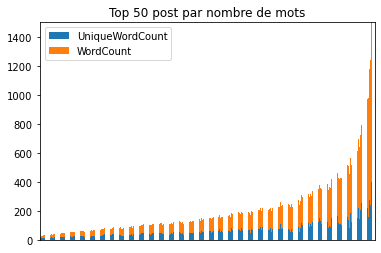

Wall time: 29.4 s


In [10]:
%%time

# Affichage des fréquences
dfPlot = df.sort_values(by="WordCount")[['UniqueWordCount', 'WordCount']]
display(dfPlot)
dfPlot.plot(kind='bar', title='Top 50 post par nombre de mots', stacked=True, ylim=(0, 1500))
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.show()

In [11]:
def var_desc(feat, df, text=False, hist=False, boxplot=False, bpShowFliers=False):
    if text:
        print("Description basique de", feat)
        print("  min max", df[feat].min(), df[feat].max())
        # print("val_counts",df[feat].value_counts())
        print("  moyenne", round(df[feat].mean(), 3))
        print("  medianne", df[feat].median())
        # truc moche pour eviter d'avoir le type de la serie renvoyée par mode()
        modes = df[feat].mode()
        print("  mode ", end='')
        for m in modes:
            print(m, end=' ')
        print(" ")
        print("  variance empirique", round(df[feat].var(ddof=0), 3))
        print("  ecart-type", round(df[feat].std(ddof=0), 3))
    if hist:
        df[feat].hist(figsize=(8, 6), bins=100, legend=True)
        plt.show()
    if boxplot:
        medianprops = {'color': "black"}
        meanprops = {'marker': 'o', 'markeredgecolor': 'black', 'markerfacecolor': 'firebrick'}
        fig1, ax1 = plt.subplots(figsize=(4, 3), dpi=80)
        ax1.set_title(feat)
        ax1.boxplot(df[feat].dropna(), vert=False, showfliers=bpShowFliers, medianprops=medianprops,
                    patch_artist=True, showmeans=True, meanprops=meanprops)
        plt.show()

Description basique de WordCount
  min max 8 3679
  moyenne 154.045
  medianne 91.0
  mode 32  
  variance empirique 47651.138
  ecart-type 218.291


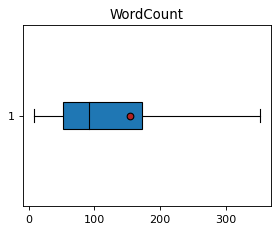

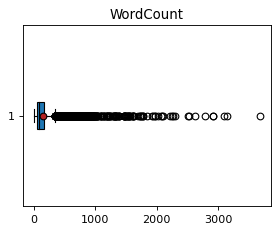

In [12]:
var_desc('WordCount', df, text=True, boxplot=True, bpShowFliers=False)
var_desc('WordCount', df, text=False, boxplot=True, bpShowFliers=True)

Description basique de UniqueWordCount
  min max 4 710
  moyenne 66.136
  medianne 51.0
  mode 38  
  variance empirique 2812.201
  ecart-type 53.03


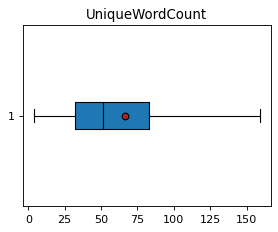

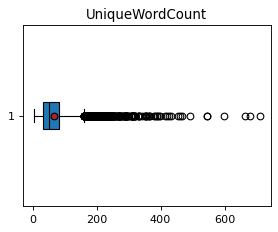

In [13]:
var_desc('UniqueWordCount', df, text=True, boxplot=True, bpShowFliers=False)
var_desc('UniqueWordCount', df, text=False, boxplot=True, bpShowFliers=True)

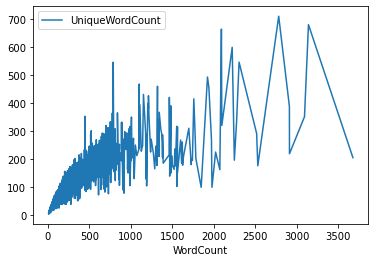

In [14]:
dfPlot.plot('WordCount', 'UniqueWordCount')
plt.show()

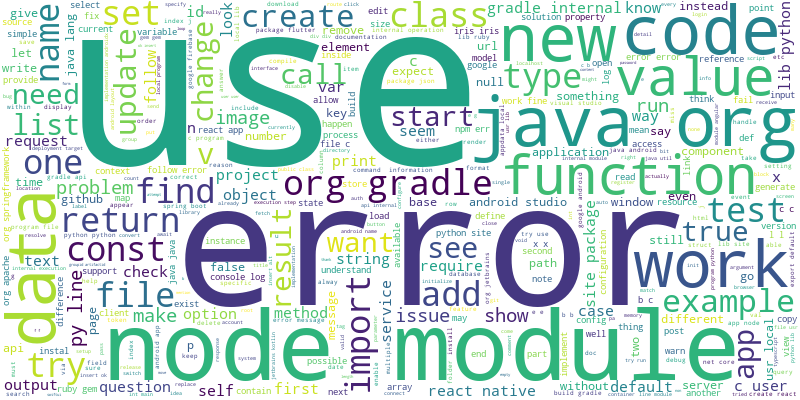

In [15]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(df['Text'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue', width=800, height=400)
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

## Tf-Idf pour KMeans

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn import metrics

from sklearn.cluster import KMeans, MiniBatchKMeans

vectorizer = TfidfVectorizer(
    max_df=0.5,
    # max_features=opts.n_features,
    min_df=2,
    stop_words="english",
    use_idf=True,
)

In [17]:
%%time

X = vectorizer.fit_transform(df['Text'])

Wall time: 750 ms


In [18]:
print("n_samples: %d, n_features: %d" % X.shape)


n_samples: 8069, n_features: 15794


In [19]:
%%time

# Elbow method 
# --------------- /!\ c'est tres long selon la plage choisie /!\ ---------------
import seaborn as sns

if False:
    sse = {}
    for k in range(10, 400, 50):
        print(k, end=" ")
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        sse[k] = kmeans.inertia_  # SSE to closest cluster centroid
    plt.title('The Elbow Method')
    plt.xlabel('k')
    plt.ylabel('SSE')
    sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
    plt.show()

Wall time: 119 ms


In [20]:
# on choisi 40 clusters d'apres elbow
nk = 40

In [21]:
%%time

km = KMeans(
    n_clusters=nk,
    init="k-means++",
    max_iter=100,
    n_init=1
)
print("Clustering sparse data with %s" % km)
km.fit(X)

Clustering sparse data with KMeans(max_iter=100, n_clusters=40, n_init=1)
Wall time: 8.65 s


KMeans(max_iter=100, n_clusters=40, n_init=1)

In [22]:
%%time

print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, km.labels_, sample_size=1000))

Silhouette Coefficient: 0.016
Wall time: 49 ms


In [23]:
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()
for i in range(nk):
    print("Topic %d:" % i, end="")
    for ind in order_centroids[i, :10]:
        print(" %s" % terms[ind], end="")
    print()


Topic 0: const data request api response await user token return header
Topic 1: string public class type new record id private var java
Topic 2: flutter dart android web package app widget pub build src
Topic 3: java android org internal gradle lang com jdk activitythread execute
Topic 4: xcode io simulator app build device target apple iphone error
Topic 5: error app run code google try work new test version
Topic 6: package yarn install instal composer dependency json npm error apt
Topic 7: python conda tensorflow install version instal run error import cuda
Topic 8: color child theme widget text style icon background white change
Topic 9: docker container run image compose desktop wsl build dockerfile command
Topic 10: foo bar int template std function class type struct baz
Topic 11: model train kera loss self tf tensorflow layer batch input
Topic 12: pip python install package requirement py wheel instal txt error
Topic 13: std vector int cout include template typename auto const 

## bag-of-word with LDA

In [24]:
%%time

from gensim.corpora.dictionary import Dictionary
from gensim import models

# Create a corpus from a list of texts
g_text = df['Text_tok'].to_list()
dictionary = Dictionary(g_text)
bow_corpus = [dictionary.doc2bow(text) for text in g_text]

Wall time: 1.52 s


In [25]:
'''
Checking dictionary created
'''
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 args
1 array
2 arrays
3 code
4 deepequals
5 default
6 e
7 equal
8 false
9 follow
10 foo


In [26]:
len(dictionary)

47601

In [27]:
%%time

# Train the model on the corpus.
lda = models.LdaModel(bow_corpus, num_topics=10, id2word = dictionary)

Wall time: 4.16 s


In [28]:
lda.get_topics().shape

(10, 47601)

In [29]:
'''
For each topic, we will explore the words occuring in that topic and its relative weight
'''
for idx, topic in lda.print_topics(-1):
    print("Topic: {} \nWords: {}".format(idx, topic))
    print("\n")


Topic: 0 
Words: 0.034*"module" + 0.028*"node" + 0.026*"react" + 0.025*"j" + 0.021*"eslint" + 0.019*"error" + 0.012*"vue" + 0.011*"loader" + 0.010*"app" + 0.010*"project"


Topic: 1 
Words: 0.039*"conda" + 0.024*"py" + 0.022*"forge" + 0.012*"error" + 0.009*"use" + 0.009*"file" + 0.009*"package" + 0.008*"get" + 0.008*"name" + 0.008*"user"


Topic: 2 
Words: 0.022*"app" + 0.015*"use" + 0.008*"android" + 0.007*"get" + 0.007*"view" + 0.007*"work" + 0.007*"com" + 0.007*"user" + 0.006*"import" + 0.006*"try"


Topic: 3 
Words: 0.040*"android" + 0.021*"com" + 0.014*"qemu" + 0.012*"error" + 0.012*"java" + 0.011*"version" + 0.011*"build" + 0.009*"kotlin" + 0.009*"implementation" + 0.008*"file"


Topic: 4 
Words: 0.089*"java" + 0.053*"org" + 0.028*"internal" + 0.019*"gradle" + 0.018*"apache" + 0.015*"util" + 0.013*"run" + 0.012*"jdk" + 0.012*"jvm" + 0.012*"com"


Topic: 5 
Words: 0.016*"run" + 0.016*"error" + 0.015*"user" + 0.013*"docker" + 0.012*"file" + 0.011*"use" + 0.011*"pyenv" + 0.010*"vers

In [30]:
import pyLDAvis as pyLDAv
import pyLDAvis.gensim_models as gensimvis

pyLDAv.enable_notebook()
gensimvis.prepare(lda, bow_corpus, dictionary)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6     -0.115958 -0.063598       1        1  19.767244
2     -0.070315 -0.016994       2        1  15.185743
0      0.019271  0.005875       3        1  12.117365
9     -0.151702 -0.140179       4        1  10.237330
5      0.019165  0.164033       5        1   9.464314
8      0.017874  0.009974       6        1   7.255636
3      0.065063 -0.046097       7        1   7.006712
7      0.018182  0.127547       8        1   6.770020
1     -0.066607  0.065857       9        1   6.298984
4      0.265028 -0.106418      10        1   5.896651, topic_info=         Term         Freq        Total Category  logprob  loglift
20       java  8524.000000  8524.000000  Default  30.0000  30.0000
435       org  4817.000000  4817.000000  Default  29.0000  29.0000
321   android  6576.000000  6576.000000  Default  28.0000  28.0000
3888    conda  3315.000000  3315.000000  Default  27.0000  27.0000
714      node  5045.000000  5045.000000  Default  26.0000  26.0000
...       ...          ...          ...      ...      ...      ...
114       run   952.866519  7354.031916  Topic10  -4.3428   0.7873
326       api   433.429490  1939.114218  Topic10  -5.1305   1.3325
292   version   507.072615  6000.297502  Topic10  -4.9736   0.3599
544      call   437.840764  2974.201532  Topic10  -5.1204   0.9149
567    module   461.592639  7282.653230  Topic10  -5.0676   0.0722

[812 rows x 6 columns], token_table=       Topic      Freq        Term
term                              
13634      6  0.959174      accent
9556       1  0.043465   accordion
9556       4  0.912774   accordion
126        1  0.022004  activation
126        2  0.011002  activation
...      ...       ...         ...
6080       2  0.013262         zsh
6080       3  0.013262         zsh
6080       5  0.079570         zsh
6080       9  0.875271         zsh
9797       6  0.932309        zulu

[3774 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 3, 1, 10, 6, 9, 4, 8, 2, 5])

In [31]:
from gensim.models import CoherenceModel

# Compute Perplexity
print('\nPerplexity: ', lda.log_perplexity(bow_corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda, texts=g_text, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -8.390521674373765

Coherence Score:  0.4658646202906809


#### Avec Mallet's  LDA

In [32]:
import os
from gensim.models.wrappers import LdaMallet
os.environ.update({'MALLET_HOME': r'C:\Users\beb4e\Documents\OpenClassrooms\P5\mallet-2.0.8\mallet-2.0.8'})
# You should update this path as per the path of Mallet directory on your system.
mallet_path = r'C:\Users\beb4e\Documents\OpenClassrooms\P5\mallet-2.0.8\mallet-2.0.8\bin\mallet'
# You should update this path as per the path of Mallet directory on your system.

In [33]:
%%time

mallet_lda = models.wrappers.LdaMallet(mallet_path, corpus=bow_corpus, num_topics=10, id2word=dictionary)

Wall time: 55.4 s


In [34]:
# on converti le modele Mallet's LDA en LDA, pour l'affichage: pyLDAvis n'aime pas les modeles Mallet...
mallet_lda_backTo_lda = models.wrappers.ldamallet.malletmodel2ldamodel(mallet_lda)
gensimvis.prepare(mallet_lda_backTo_lda, bow_corpus, dictionary)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.144571 -0.042285       1        1  10.790601
8     -0.217630 -0.097043       2        1  10.758272
4      0.219386 -0.168319       3        1  10.703668
5     -0.200899 -0.190918       4        1  10.211576
7     -0.060861  0.057341       5        1  10.164382
2      0.149678 -0.025594       6        1   9.970135
6      0.154927  0.261251       7        1   9.802724
9     -0.216814  0.026872       8        1   9.586162
1      0.191098 -0.041050       9        1   9.447179
0     -0.163455  0.219743      10        1   8.565301, topic_info=        Term         Freq        Total Category  logprob  loglift
20      java  9276.000000  9276.000000  Default  30.0000  30.0000
435      org  6394.000000  6394.000000  Default  29.0000  29.0000
567   module  7196.000000  7196.000000  Default  28.0000  28.0000
321  android  8197.000000  8197.000000  Default  27.0000  27.0000
714     node  5527.000000  5527.000000  Default  26.0000  26.0000
..       ...          ...          ...      ...      ...      ...
431     null   512.185619  1762.069237  Topic10  -5.3369   1.2219
43      work   612.212458  5210.296364  Topic10  -5.1585   0.3161
37      true   572.442751  3751.813312  Topic10  -5.2257   0.5774
544     call   500.134193  2990.814704  Topic10  -5.3607   0.6690
557   import   496.518765  5961.987687  Topic10  -5.3680  -0.0281

[900 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
1262     10  0.997019    abstract
538       2  0.069227      access
538       5  0.657316      access
538       6  0.038383      access
538       7  0.090475      access
...     ...       ...         ...
1260      6  0.992419         xsd
731       1  1.000469        yarn
684       4  0.999674        year
5537      5  1.003035         yup
3528     10  1.003452  zygoteinit

[1516 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 9, 5, 6, 8, 3, 7, 10, 2, 1])

In [35]:
# Compute Perplexity
# erreur avec Mallet, tant pis pour cette mesure

# Compute Coherence Score
coherence_model_mallet_lda = CoherenceModel(model=mallet_lda, texts=g_text, dictionary=dictionary, coherence='c_v')
coherence_mallet_lda = coherence_model_mallet_lda.get_coherence()
print('\nCoherence Score: ', coherence_mallet_lda)


Coherence Score:  0.6099567929050842


### recherche du nombre de topic optimal

In [36]:
def coherencePlot(coherence_values, start, limit, step):
    x = range(start, limit, step)
    plt.plot(x, coherence_values)
    plt.xlabel("Num Topics")
    plt.ylabel("Coherence score")
    plt.legend(["coherence_values"], loc='best')
    plt.show()

In [37]:
def compute_coherence_values(dictionary, corpus, texts, with_mallet, limit, start=2, step=3, random_state=42):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        if with_mallet:
            model = models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=dictionary,
                                              random_seed=random_state)
        else:
            model = models.LdaModel(corpus, num_topics=num_topics, id2word=dictionary, random_state=random_state)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [38]:
%%time

model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=bow_corpus, texts=g_text,
                                                        with_mallet=False,
                                                        start=2, limit=40, step=6)

Wall time: 2min 19s


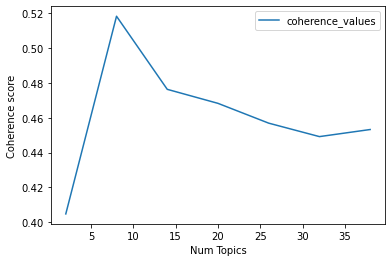

In [39]:
# Show graph
coherencePlot(coherence_values, 2, 40, 6)

In [40]:
%%time

model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=bow_corpus, texts=g_text,
                                                        with_mallet=True,
                                                        start=2, limit=40, step=6)

Wall time: 8min 26s


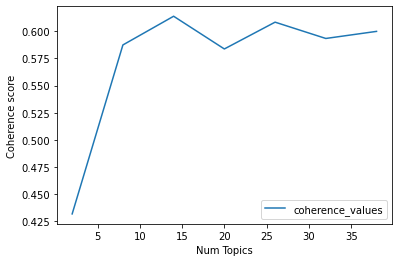

In [41]:
# Show graph
coherencePlot(coherence_values, 2, 40, 6)

----------- LDA -------------


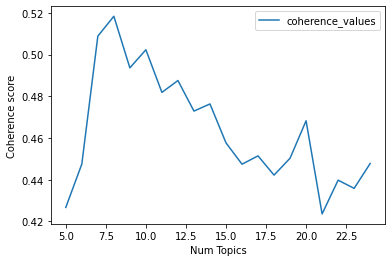

----------- Mallet LDA ------


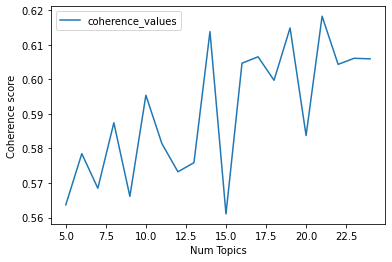

Wall time: 29min 51s


In [42]:
%%time

# vu les resultats précedents, on affine la recherche 
limit = 25
start = 5
step = 1


print("----------- LDA -------------")
model_list_lda, coherence_values_lda = compute_coherence_values(dictionary=dictionary, corpus=bow_corpus, texts=g_text,
                                                        with_mallet=False,
                                                        start=start, limit=limit, step=step)
coherencePlot(coherence_values_lda, start, limit, step)


print("----------- Mallet LDA ------")
model_list_mlda, coherence_values_mlda = compute_coherence_values(dictionary=dictionary, corpus=bow_corpus, texts=g_text,
                                                        with_mallet=True,
                                                        start=start, limit=limit, step=step)
coherencePlot(coherence_values_mlda, start, limit, step)

In [43]:
# selection du meilleur modele
print("Modele: ", end="")
max_lda = max(coherence_values_lda)
max_mlda = max(coherence_values_mlda)
if(max_lda > max_mlda):
    idx = coherence_values_lda.index(max_lda)
    optimal_model = model_list_lda[idx]
    print("LDA (%f)" % max_lda)
else:
    idx = coherence_values_mlda.index(max_mlda)
    optimal_model = model_list_mlda[idx]
    print("Mallet LDA (%f)" % max_mlda)

n_topic = idx+start
print("Nombre de topics:", n_topic)

Modele: Mallet LDA (0.618320)
Nombre de topics: 21


In [44]:

mallet_lda_backTo_lda = models.wrappers.ldamallet.malletmodel2ldamodel(optimal_model)
gensimvis.prepare(mallet_lda_backTo_lda, bow_corpus, dictionary)

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
11     0.125188 -0.066598       1        1  6.313503
9      0.091407  0.098882       2        1  6.001226
12     0.117483 -0.104305       3        1  5.327062
19    -0.219099  0.223059       4        1  5.228930
2     -0.235013  0.021948       5        1  5.228437
0      0.063528 -0.231026       6        1  5.113720
16    -0.237003  0.049926       7        1  5.108778
17    -0.042249 -0.032353       8        1  5.076172
13    -0.203724 -0.121921       9        1  4.913864
6     -0.214295 -0.114348      10        1  4.879871
7      0.083872  0.118505      11        1  4.820551
1     -0.149003 -0.135976      12        1  4.591674
20    -0.104113  0.210499      13        1  4.571041
4      0.137571  0.165576      14        1  4.522852
3      0.177852  0.108432      15        1  4.326645
10     0.162644  0.049889      16        1  4.238858
14     0.027268 -0.043631      17        1  4.235427
5      0.137628  0.039944      18        1  4.131560
18     0.110703 -0.048050      19        1  4.103419
8      0.026376 -0.093283      20        1  3.635632
15     0.142977 -0.095168      21        1  3.630778, topic_info=            Term         Freq        Total Category  logprob  loglift
20          java  9126.000000  9126.000000  Default  30.0000  30.0000
321      android  7926.000000  7926.000000  Default  29.0000  29.0000
435          org  6401.000000  6401.000000  Default  28.0000  28.0000
567       module  7039.000000  7039.000000  Default  27.0000  27.0000
601       python  4809.000000  4809.000000  Default  26.0000  26.0000
..           ...          ...          ...      ...      ...      ...
444      project   352.721361  4033.254392  Topic21  -4.8516   0.8791
329  application   289.412399  2375.484508  Topic21  -5.0495   1.2106
9         follow   308.792693  3494.122780  Topic21  -4.9846   0.8896
147        class   325.588948  5297.601806  Topic21  -4.9317   0.5263
338        build   304.916634  6203.927442  Topic21  -4.9973   0.3028

[1879 rows x 6 columns], token_table=       Topic      Freq                                Term
term                                                      
7446       8  1.021236                                 aad
2315      20  0.778348                                aapl
6247      13  1.006348                          absolutely
10735     21  1.006177  abstractautowirecapablebeanfactory
10736     21  0.995120                 abstractbeanfactory
...      ...       ...                                 ...
29259     21  1.010477                                 zoo
9815       9  1.003600                                zoom
6080      14  0.017947                                 zsh
6080      15  0.978118                                 zsh
3528       6  0.997398                          zygoteinit

[3604 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[12, 10, 13, 20, 3, 1, 17, 18, 14, 7, 8, 2, 21, 5, 4, 11, 15, 6, 19, 9, 16])

## Finding the dominant topic in each sentence

Le 'Taggage' a proprement parler, meme si on a pas de 'tag' pour le moment, juste une liste de mots clés

In [45]:
def format_topics_sentences(ldamodel, corpus, texts):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic, 4), topic_keywords]),
                                                       ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=bow_corpus, texts=g_text)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,2.0,0.2636,"int, std, return, type, foo, function, main, t...","[java, record, array, give, follow, code, publ..."
1,1,20.0,0.2842,"work, test, code, problem, find, issue, change...","[blue, flicker, stripe, mbp, chrome, new, macb..."
2,2,14.0,0.2445,"app, firebase, message, google, aws, service, ...","[create, dependson, relation, ec, rds, use, aw..."
3,3,9.0,0.4477,"python, file, py, line, package, lib, model, s...","[colab, class, weight, cause, valueerror, trut..."
4,4,6.0,0.1304,"string, class, type, public, object, id, key, ...","[pas, custom, function, inside, foreach, objec..."
...,...,...,...,...,...
8064,8064,12.0,0.4302,"java, org, gradle, internal, execute, executio...","[daemon, stop, immediately, jvm, garbage, coll..."
8065,8065,6.0,0.1686,"string, class, type, public, object, id, key, ...","[difference, mono, flux, fromcallable, mono, d..."
8066,8066,2.0,0.2271,"int, std, return, type, foo, function, main, t...","[compare, generic, structs, c, want, compare, ..."
8067,8067,14.0,0.5446,"app, firebase, message, google, aws, service, ...","[set, custom, http, error, kubernetes, want, c..."


## Find the most representative document for each topic

TODO: selectionner les X premiers mots clés et/ou dont poids supérieur à un seuil

      remettre ca avec le vrai doc original, plus lisible, pour en extraire le (ou les) tag pertinent


In [46]:
# on charge l'original, car on se sert de la version lisible pour creer des tags pertinents
df_orig = pd.read_csv("Questions.csv")
df_orig

,Id,Title,Body,Tags
0,61261226,Java 14 records and arrays,<p>Given the following code:</p>\n\n<pre><code...,<java><arrays><java-14><java-record>
1,61250722,Blue flickering stripes on my MBP with Chrome,"<p>On my new Macbook Pro 16 late 2019, with Ca...",<google-chrome><graphics><macos-catalina>
2,61250772,How can I create a DependsOn relation between ...,<p>I am currently using the <em>aws-cdk</em> (...,<amazon-web-services><amazon-ec2><amazon-rds><...
3,61261907,on colab - class_weight is causing a ValueErro...,<p>i'm running a CNN with keras sequential on ...,<python><tensorflow><keras><google-colaborator...
4,61273189,How to pass a custom function inside a ForEach...,<p>I can't find a way to pass the function. Ju...,<powershell><powershell-core>
...,...,...,...,...
8064,59624003,Daemon is stopping immediately JVM garbage col...,<p>When I build multi module java project usin...,<java><gradle>
8065,60077499,Difference between Mono/Flux.fromCallable and ...,<p>I usually have the requirement of generatin...,<spring-webflux><project-reactor>
8066,60079990,How to compare generic structs in C++?,<p>I want to compare structs in a generic way ...,<c++><templates><struct><padding><memcmp>
8067,60080132,How to set up a custom HTTP error in Kubernetes,<p>I want to create a custom 403 error page.\n...,<kubernetes><kubernetes-ingress>


In [47]:
df_topic_sents_keywords_readable = pd.concat([df_orig, df_topic_sents_keywords], axis=1)
df_topic_sents_keywords_readable

,Id,Title,Body,Tags,Dominant_Topic,Perc_Contribution,Topic_Keywords,0
0,61261226,Java 14 records and arrays,<p>Given the following code:</p>\n\n<pre><code...,<java><arrays><java-14><java-record>,2.0,0.2636,"int, std, return, type, foo, function, main, t...","[java, record, array, give, follow, code, publ..."
1,61250722,Blue flickering stripes on my MBP with Chrome,"<p>On my new Macbook Pro 16 late 2019, with Ca...",<google-chrome><graphics><macos-catalina>,20.0,0.2842,"work, test, code, problem, find, issue, change...","[blue, flicker, stripe, mbp, chrome, new, macb..."
2,61250772,How can I create a DependsOn relation between ...,<p>I am currently using the <em>aws-cdk</em> (...,<amazon-web-services><amazon-ec2><amazon-rds><...,14.0,0.2445,"app, firebase, message, google, aws, service, ...","[create, dependson, relation, ec, rds, use, aw..."
3,61261907,on colab - class_weight is causing a ValueErro...,<p>i'm running a CNN with keras sequential on ...,<python><tensorflow><keras><google-colaborator...,9.0,0.4477,"python, file, py, line, package, lib, model, s...","[colab, class, weight, cause, valueerror, trut..."
4,61273189,How to pass a custom function inside a ForEach...,<p>I can't find a way to pass the function. Ju...,<powershell><powershell-core>,6.0,0.1304,"string, class, type, public, object, id, key, ...","[pas, custom, function, inside, foreach, objec..."
...,...,...,...,...,...,...,...,...
8064,59624003,Daemon is stopping immediately JVM garbage col...,<p>When I build multi module java project usin...,<java><gradle>,12.0,0.4302,"java, org, gradle, internal, execute, executio...","[daemon, stop, immediately, jvm, garbage, coll..."
8065,60077499,Difference between Mono/Flux.fromCallable and ...,<p>I usually have the requirement of generatin...,<spring-webflux><project-reactor>,6.0,0.1686,"string, class, type, public, object, id, key, ...","[difference, mono, flux, fromcallable, mono, d..."
8066,60079990,How to compare generic structs in C++?,<p>I want to compare structs in a generic way ...,<c++><templates><struct><padding><memcmp>,2.0,0.2271,"int, std, return, type, foo, function, main, t...","[compare, generic, structs, c, want, compare, ..."
8067,60080132,How to set up a custom HTTP error in Kubernetes,<p>I want to create a custom 403 error page.\n...,<kubernetes><kubernetes-ingress>,14.0,0.5446,"app, firebase, message, google, aws, service, ...","[set, custom, http, error, kubernetes, want, c..."


In [48]:
# Group Top X sentences under each topic
num_TopSentence = 2

sent_topics_sorteddf_mallet = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet,
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(num_TopSentence)],
                                            axis=0)

# Reset Index
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

# Show
sent_topics_sorteddf_mallet

,Topic_Num,Topic_Perc_Contrib,Keywords,Text
0,0.0,0.8427,"android, app, implementation, androidx, google...","[viewmodel, zero, argument, constructor, hilt,..."
1,0.0,0.8185,"android, app, implementation, androidx, google...","[android, navigation, component, navhostfragme..."
2,1.0,0.7524,"react, const, component, import, page, return,...","[render, component, store, state, change, stuc..."
3,1.0,0.6974,"react, const, component, import, page, return,...","[react, router, custom, history, work, use, br..."
4,2.0,0.8064,"int, std, return, type, foo, function, main, t...","[intel, skylake, kaby, lake, cpu, incur, myste..."
5,2.0,0.7932,"int, std, return, type, foo, function, main, t...","[possible, undefined, behavior, primitive, sta..."
6,3.0,0.9540,"version, lib, install, usr, ruby, local, user,...","[rail, typeerror, unable, resolve, type, size,..."
7,3.0,0.8961,"version, lib, install, usr, ruby, local, user,...","[chromedriver, capybara, many, open, file, soc..."
8,4.0,0.7965,"file, run, github, build, command, create, err...","[rmd, compilation, fail, due, latex, try, knit..."
9,4.0,0.6494,"file, run, github, build, command, create, err...","[git, submodule, update, fail, fatal, remote, ..."


In [49]:
# Group Top X sentences under each topic, version lisible
def readableBestNQuestions(n=1):
    num_TopSentence = n

    sent_topics_sorteddf_mallet = pd.DataFrame()

    sent_topics_outdf_grpd = df_topic_sents_keywords_readable.groupby('Dominant_Topic')

    for i, grp in sent_topics_outdf_grpd:
        sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet,
                                                 grp.sort_values(['Perc_Contribution'], ascending=[0]).head(num_TopSentence)],
                                                axis=0)

    # Reset Index
    sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

    # Format
    sent_topics_sorteddf_mallet.columns = ['Id', 'Title', 'Body', 'ExistingTags',
                                           'Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

    # Show
    return sent_topics_sorteddf_mallet

In [50]:
def printBold(text):
    print('\033[1m{:10s}\033[0m'.format(text))

In [51]:
from IPython.display import display, HTML
from bs4 import BeautifulSoup


def showReadableDesc(topic, n, showBody=True, showHtml=False):
    # Get Top n sentences for topic
    readable = readableBestNQuestions(n)
    res = readable[readable['Topic_Num'] == topic]

    for i in range(0, n):
        printBold("Topic "+str(topic)+" exemple "+str(i+1)+"/"+str(n))
        print("Keywords:", res['Keywords'].iloc[0])
        print("  Id:", res['Id'].iloc[i], "Contrib:", res['Topic_Perc_Contrib'].iloc[i])
        print("  StackOverflow Tags:", res['ExistingTags'].iloc[i])
        print("  Titre:", res['Title'].iloc[i])
        printBold("**********************************************************************")
        if showBody and showHtml:
            display(HTML(res['Body'].iloc[i]))
        elif showBody:
            print(BeautifulSoup(res['Body'].iloc[i], 'html.parser').get_text())


showReadableDesc(1, 2, showBody=False)

Topic 1 exemple 1/2
Keywords: react, const, component, import, page, return, data, state, export, function
  Id: 62309220 Contrib: 0.7524
  StackOverflow Tags: <reactjs><redux><react-redux>
  Titre: Re-render the component when the store state is changed
**********************************************************************
Topic 1 exemple 2/2
Keywords: react, const, component, import, page, return, data, state, export, function
  Id: 62449663 Contrib: 0.6974
  StackOverflow Tags: <reactjs><react-router><create-react-app><react-router-dom><history>
  Titre: React Router with custom history not working
**********************************************************************


In [52]:
for i in range(0, n_topic):
    showReadableDesc(i, 3, showBody=False)

Topic 0 exemple 1/3
Keywords: android, app, implementation, androidx, google, java, layout, kotlin, version, fragment
  Id: 65066853 Contrib: 0.8427
  StackOverflow Tags: <java><android><viewmodel><android-lifecycle><dagger-hilt>
  Titre: ViewModel has no zero argument constructor hilt Java
**********************************************************************
Topic 0 exemple 2/3
Keywords: android, app, implementation, androidx, google, java, layout, kotlin, version, fragment
  Id: 63739674 Contrib: 0.8185
  StackOverflow Tags: <android><kotlin><android-jetpack><android-jetpack-navigation>
  Titre: Android Navigation component: No NavHostFragments found error
**********************************************************************
Topic 0 exemple 3/3
Keywords: android, app, implementation, androidx, google, java, layout, kotlin, version, fragment
  Id: 62471849 Contrib: 0.8116
  StackOverflow Tags: <android><kotlin><android-jetpack><dagger-hilt>
  Titre: Cannot create instance of viewmod

Topic 8 exemple 1/3
Keywords: error, angular, import, core, module, color, type, ng, dynamic, node
  Id: 69044514 Contrib: 0.9129
  StackOverflow Tags: <android><kotlin><android-recyclerview><material-components-android><multiview>
  Titre: material-1.5.0-alpha03\res\values-v31\values-v31.xml:3:5-94: AAPT: error: resource android:color/system_neutral1_1000 not found
**********************************************************************
Topic 8 exemple 2/3
Keywords: error, angular, import, core, module, color, type, ng, dynamic, node
  Id: 60168106 Contrib: 0.9028
  StackOverflow Tags: <angular6>
  Titre: After installing a CDK of angular getting an error during compilation
**********************************************************************
Topic 8 exemple 3/3
Keywords: error, angular, import, core, module, color, type, ng, dynamic, node
  Id: 60348728 Contrib: 0.8459
  StackOverflow Tags: <angular><bootstrap-4><ng-bootstrap>
  Titre: After I install ng bootstrap and compile, I get t

## Topic distribution across documents

In [53]:
# Number of Documents for Each Topic
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()

# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), 4)

# Topic Number and Keywords
topic_num_keywords = df_topic_sents_keywords[['Dominant_Topic', 'Topic_Keywords']]

# /!\ modif perso parce que y'a un bug dans le truc...
topic_num_keywords = topic_num_keywords.drop_duplicates(subset=['Dominant_Topic']).reset_index(drop=True)

# Concatenate Column wise
df_dominant_topics = pd.concat([topic_num_keywords, topic_counts, topic_contribution], axis=1)

# Change Column names
df_dominant_topics.columns = ['Dominant_Topic', 'Topic_Keywords', 'Num_Documents', 'Perc_Documents']

df_dominant_topics = df_dominant_topics.set_index('Dominant_Topic')


# Show
df_dominant_topics.sort_values(['Perc_Documents'], ascending=[0])

,Topic_Keywords,Num_Documents,Perc_Documents
Dominant_Topic,,,
14.0,"app, firebase, message, google, aws, service, ...",698,0.0865
11.0,"module, node, react, npm, app, loader, err, vu...",566,0.0701
19.0,"case, question, make, function, time, understa...",536,0.0664
13.0,"text, view, color, item, class, var, width, st...",511,0.0633
20.0,"work, test, code, problem, find, issue, change...",506,0.0627
8.0,"error, angular, import, core, module, color, t...",463,0.0574
12.0,"java, org, gradle, internal, execute, executio...",461,0.0571
10.0,"build, io, target, library, error, project, xc...",437,0.0542
3.0,"version, lib, install, usr, ruby, local, user,...",423,0.0524
